In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
# Load dataset
df = pd.read_csv(r"C:\Users\Bridget\Downloads\archive (1)\traffic.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [11]:
df["DateTime"] = pd.to_datetime(df["DateTime"])
df["Hour"] = df["DateTime"].dt.hour
df["Day"] = df["DateTime"].dt.day
df["Weekday"] = df["DateTime"].dt.weekday  # Monday = 0, Sunday = 6
df["Month"] = df["DateTime"].dt.month

In [13]:
df.drop(columns=["ID"], inplace=True)  # Assuming ID isn't needed


In [15]:
scaler = MinMaxScaler()
df["Vehicles"] = scaler.fit_transform(df[["Vehicles"]])

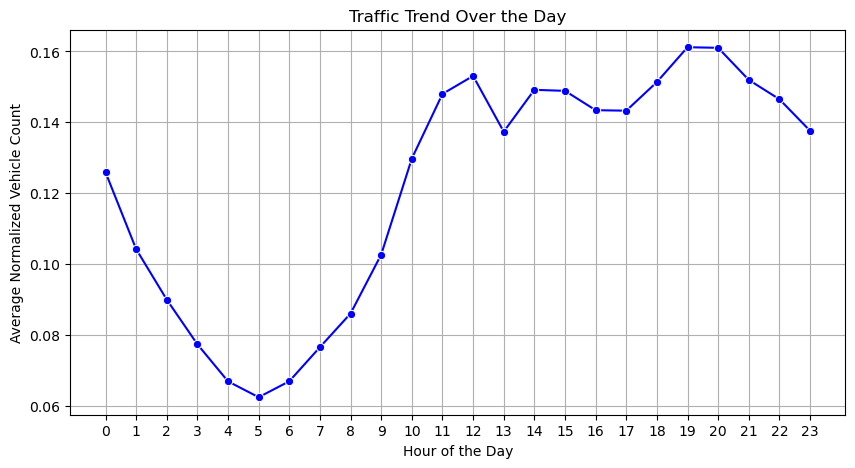

In [17]:
# Aggregate data by hour
hourly_traffic = df.groupby("Hour")["Vehicles"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker='o', linestyle='-', color='b')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Normalized Vehicle Count")
plt.title("Traffic Trend Over the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [34]:
# Define features and target variable
X = df.drop(columns=["Vehicles", "DateTime"])  # Features
y = df["Vehicles"]  # Target variable

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.026073973585589102
Mean Squared Error: 0.001674850840204401


In [37]:
# Define features (time & location-based) and target variable
X = df.drop(columns=["Vehicles", "DateTime"])  # Features (exclude DateTime)
y = df["Vehicles"]  # Target variable (traffic volume)

# One-hot encode categorical 'Junction' column
X = pd.get_dummies(X, columns=["Junction"], drop_first=True)

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.026240213014948662
Mean Squared Error (MSE): 0.0016939180542734076


In [41]:
# Example: Predict traffic for Junction 3 at 5 PM on a Monday in June
sample_input = pd.DataFrame({
    "Hour": [17], 
    "Day": [10], 
    "Weekday": [0], 
    "Month": [6],
    "Junction_2": [0],  # Adjust based on one-hot encoding
    "Junction_3": [1], 
    "Junction_4": [0]
})

# Predict traffic volume
predicted_traffic = model.predict(sample_input)
print(f"Predicted Traffic Volume: {predicted_traffic[0]}")

Predicted Traffic Volume: 0.08279329608938545


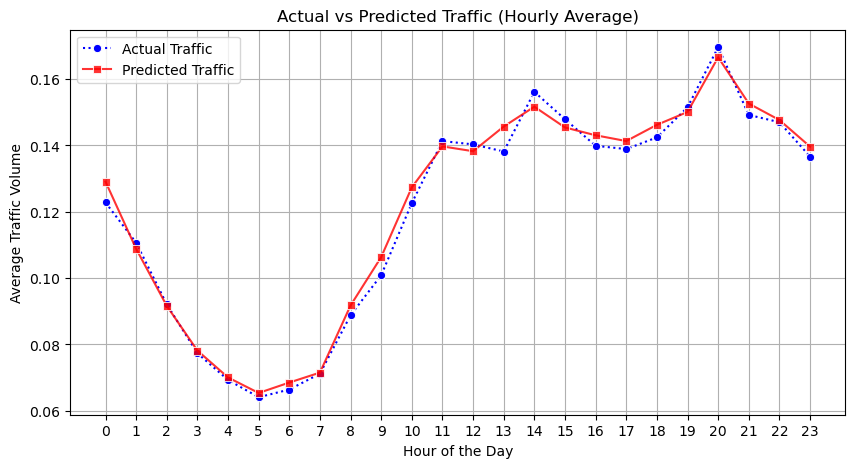

In [45]:
# Aggregate actual and predicted values by hour
df_test["Hour"] = df_test["DateTime"].dt.hour
df_hourly = df_test.groupby("Hour")[["Vehicles", "Predicted_Vehicles"]].mean()

# Plot the clearer graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_hourly.index, y=df_hourly["Vehicles"], marker="o", label="Actual Traffic", color="blue", linestyle="dotted")
sns.lineplot(x=df_hourly.index, y=df_hourly["Predicted_Vehicles"], marker="s", label="Predicted Traffic", color="red", alpha=0.8)

plt.xlabel("Hour of the Day")
plt.ylabel("Average Traffic Volume")
plt.title("Actual vs Predicted Traffic (Hourly Average)")
plt.xticks(range(0, 24))  # Ensure x-axis is readable
plt.legend()
plt.grid(True)
plt.show()
